In [1]:
import os

network_path = os.path.join("networks", "FS_SPN_feed_forward")

input_name = "FS_SPN_feed_forward"
sim_file_gj = os.path.join(network_path, "simulation", f"output-GJ-{input_name}.hdf5")
sim_file_nogj = os.path.join(network_path, "simulation", f"output-noGJ-{input_name}.hdf5")

input_config = f"{input_name}-input.json"
duration=5
osc_freq = 40

In [2]:
from snudda.init import SnuddaInit

from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337,
                 snudda_data="../../../../BasalGangliaData/data/")
# To get only FS density we use 0.013*80500, but then we also have dSPN and iSPN here in network
# so we need to compensate by a factor of 2 (if we have 50% FS, 25% dSPN, 25% iSPN in this test network)
cnc.define_striatum(num_dSPN=20, num_iSPN=20, num_FS=40, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neuron_density=0.013*80500*(1 + 0.5 + 0.5))
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
Writing networks/FS_SPN_feed_forward/network-config.json


In [ ]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

In [ ]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, verbose=False)
sd.detect()

In [ ]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

In [ ]:
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file=f"{input_name}-input.json",
                 verbose=False)
si.generate()

In [ ]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)
spi.plot_input(neuron_type="FS", num_neurons=3)
spi.plot_input(neuron_type="dSPN", num_neurons=2)
spi.plot_input(neuron_type="iSPN", num_neurons=2)

In [ ]:
os.system(f"mpiexec -n 3 snudda simulate {network_path} --time {duration} --outputFile {sim_file_gj}")

In [ ]:
os.system(f"mpiexec -n 3 snudda simulate {network_path} --time {duration} --outputFile {sim_file_nogj} --disableGJ")

In [3]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadNetworkSimulation

sl = SnuddaLoad(network_path)
sls_gj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_gj)
sls_nogj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_nogj)

nid_fs = sl.get_neuron_id_of_type("FS")
nid_dspn = sl.get_neuron_id_of_type("dSPN")
nid_ispn = sl.get_neuron_id_of_type("iSPN")

Loading 80 neurons with 1804 synapses and 125 gap junctions
Loading networks/FS_SPN_feed_forward/simulation/output-GJ-FS_SPN_feed_forward.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
2: (FS_0, pb1ef6b01, m4cd420e2)
4: (dSPN_0, pe6ec2d4b, mf702205f)
6: (iSPN_0, pf721cf77, mf2f3395e)
29: (FS_0, p59a48310, me486b19e)
32: (FS_0, pb1ef6b01, mb1b67bcc)
43: (FS_0, pb1ef6b01, m4cd420e2)
44: (FS_0, p59a48310, m4cd420e2)
51: (FS_1, pf9439e45, m48f576bb)
66: (FS_1, pf86c86e4, ma88f99b9)
67: (iSPN_0, pfb05971b, m6486ed26)
75: (FS_0, p4feff98b, m86da4874)
Loading networks/FS_SPN_feed_forward/simulation/output-noGJ-FS_SPN_feed_forward.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
2: (FS_0, pb1ef6b01, m4cd420e2)
6: (iSPN_0, pf721cf77, mf2f3395e)
29: (FS_0, p59a48310, me486b19e)
32: (FS_0, pb1ef6b01, mb1b67bcc)
43: (FS_0, pb1ef6b01, m4cd420e2)
67: (iSPN_0, pfb05971b, m6486ed26)
75: (FS_0, p4feff98b, 

Loading network info from networks/FS_SPN_feed_forward/network-synapses.hdf5
Loading 80 neurons with 1804 synapses and 125 gap junctions
Loading input info from networks/FS_SPN_feed_forward/input-spikes.hdf5
Loading networks/FS_SPN_feed_forward/simulation/output-GJ-FS_SPN_feed_forward.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
2: (FS_0, pb1ef6b01, m4cd420e2)
4: (dSPN_0, pe6ec2d4b, mf702205f)
6: (iSPN_0, pf721cf77, mf2f3395e)
29: (FS_0, p59a48310, me486b19e)
32: (FS_0, pb1ef6b01, mb1b67bcc)
43: (FS_0, pb1ef6b01, m4cd420e2)
44: (FS_0, p59a48310, m4cd420e2)
51: (FS_1, pf9439e45, m48f576bb)
66: (FS_1, pf86c86e4, ma88f99b9)
67: (iSPN_0, pfb05971b, m6486ed26)
75: (FS_0, p4feff98b, m86da4874)
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,

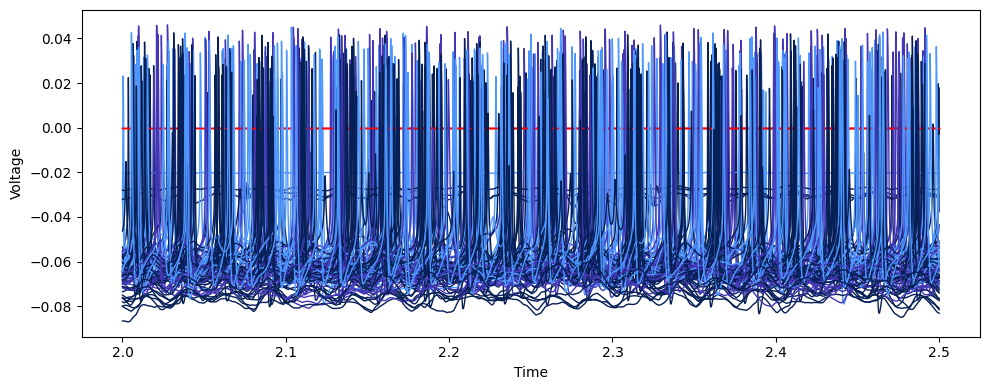

In [4]:
%matplotlib inline

from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=sim_file_gj)
# Use trace_id to specify which traces
ax = pt.plot_traces(offset=0, time_range=(2,2.5),fig_size=(10,4))

Loading network info from networks/FS_SPN_feed_forward/network-synapses.hdf5
Loading 80 neurons with 1804 synapses and 125 gap junctions
Loading input info from networks/FS_SPN_feed_forward/input-spikes.hdf5
Loading networks/FS_SPN_feed_forward/simulation/output-noGJ-FS_SPN_feed_forward.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
2: (FS_0, pb1ef6b01, m4cd420e2)
6: (iSPN_0, pf721cf77, mf2f3395e)
29: (FS_0, p59a48310, me486b19e)
32: (FS_0, pb1ef6b01, mb1b67bcc)
43: (FS_0, pb1ef6b01, m4cd420e2)
67: (iSPN_0, pfb05971b, m6486ed26)
75: (FS_0, p4feff98b, m86da4874)
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
Plotted 80 traces (total 80)
Saving to figure /home/hj

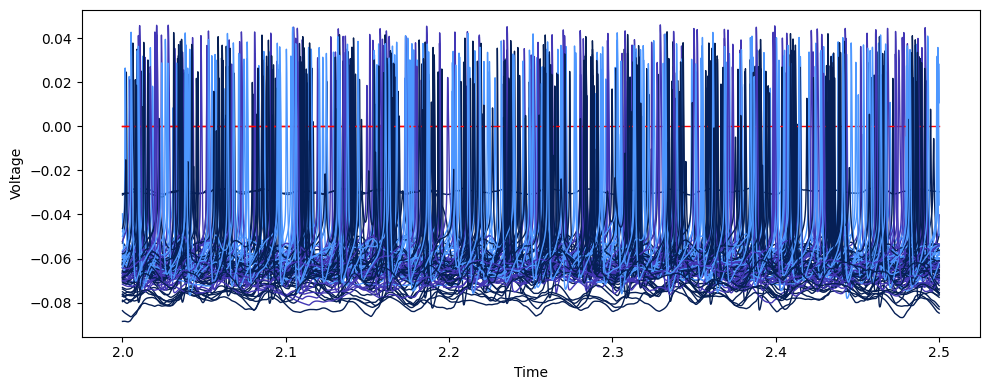

In [5]:
from snudda.plotting.plot_traces import PlotTraces
pt2 = PlotTraces(output_file=sim_file_nogj)
ax2 = pt2.plot_traces(offset=0, time_range=(2,2.5),fig_size=(10,4))

Writing figure to networks/FS_SPN_feed_forward/figures/spike-period-histogram.pdf
Writing figure to networks/FS_SPN_feed_forward/figures/spike-period-histogram.pdf
Writing figure to networks/FS_SPN_feed_forward/figures/spike-period-histogram.pdf


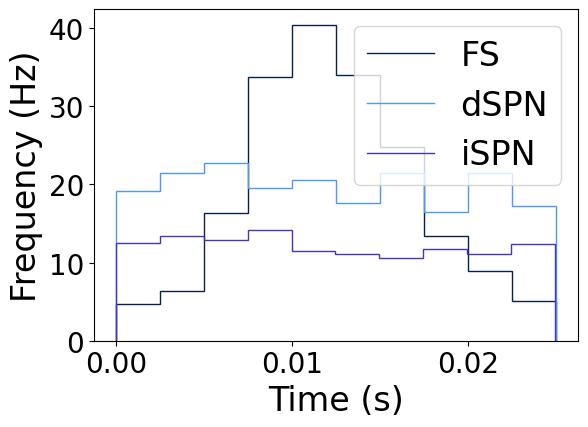

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
spr = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_gj,
                             snudda_load=sl, snudda_simulation_load=sls_gj)

ax, _, _ = spr.plot_period_histogram_mod(neuron_id=nid_fs, period=1/osc_freq, label="FS", color=spr.get_colours("FS"), show_figure=False)
ax, _, _ = spr.plot_period_histogram_mod(neuron_id=nid_dspn, period=1/osc_freq, label="dSPN", ax=ax, color=spr.get_colours("dSPN"), show_figure=False)
ax, _, _ = spr.plot_period_histogram_mod(neuron_id=nid_ispn, period=1/osc_freq, label="iSPN", ax=ax, color=spr.get_colours("iSPN"))

In [ ]:
spr.plot_spike_histogram_type(["FS", "dSPN", "iSPN"], bin_size=200e-3)

Writing figure to networks/FS_SPN_feed_forward/figures/spike-period-histogram.pdf
Writing figure to networks/FS_SPN_feed_forward/figures/spike-period-histogram.pdf
Writing figure to networks/FS_SPN_feed_forward/figures/spike-period-histogram.pdf


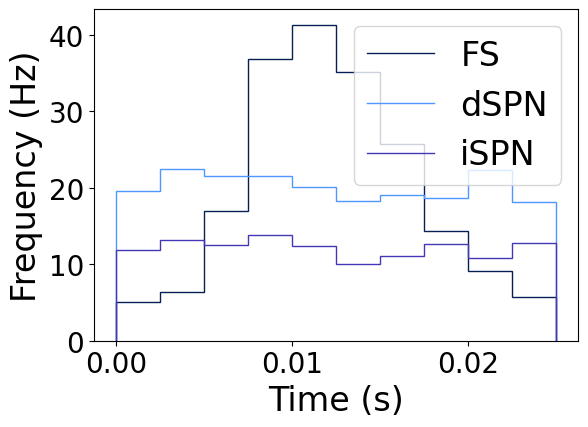

In [8]:
from snudda.plotting import SnuddaPlotSpikeRaster2
spr2 = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_nogj,
                             snudda_load=sl, snudda_simulation_load=sls_nogj)

ax, _, _ = spr2.plot_period_histogram_mod(neuron_id=nid_fs, period=1/osc_freq, label="FS", color=spr.get_colours("FS"), show_figure=False)
ax, _, _ = spr2.plot_period_histogram_mod(neuron_id=nid_dspn, period=1/osc_freq, label="dSPN", ax=ax, color=spr.get_colours("dSPN"), show_figure=False)
ax, _, _ = spr2.plot_period_histogram_mod(neuron_id=nid_ispn, period=1/osc_freq, label="iSPN", ax=ax, color=spr.get_colours("iSPN"))

In [ ]:
spr2.plot_spike_histogram_type(["FS", "dSPN", "iSPN"], bin_size=200e-3)